In [19]:
import yfinance as yf
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
import matplotlib.pyplot as plt
import seaborn as sns


In [34]:
ewz_ticker = 'EWZ'
print(f"The identified ticker symbol for the EWZ ETF is: {ewz_ticker}")

The identified ticker symbol for the EWZ ETF is: EWZ


In [21]:

# Define the start and end dates for the historical data
start_date = '2015-01-01'
end_date = '2025-12-31'

# Download historical data for the EWZ ticker
ewz_data = yf.download(ewz_ticker, start=start_date, end=end_date)

# Display the first few rows of the downloaded DataFrame
print("First 5 rows of EWZ historical data:")
print(ewz_data.head())

print(f"\nSuccessfully downloaded historical data for {ewz_ticker} from {start_date} to {end_date}.")

[*********************100%***********************]  1 of 1 completed

First 5 rows of EWZ historical data:
Price           Close       High        Low       Open    Volume
Ticker            EWZ        EWZ        EWZ        EWZ       EWZ
Date                                                            
2015-01-02  20.566610  20.938856  20.380487  20.927223  17765400
2015-01-05  19.862827  20.014051  19.804662  19.903542  22200400
2015-01-06  20.217628  20.351406  19.897730  20.136200  21194000
2015-01-07  20.764364  20.997017  20.659670  20.793446  16427500
2015-01-08  21.095892  21.270382  20.822523  20.903951  14081000

Successfully downloaded historical data for EWZ from 2015-01-01 to 2025-12-31.



The previous code generated a `FutureWarning` about `yfinance`'s `auto_adjust` parameter. While not an error, it is a good practice to  set `auto_adjust=True` to silence the warning. 


In [ ]:

# Define the ticker symbol
ewz_ticker = "EWZ"
# Define the start and end dates for the historical data 
end_date = '2025-01-01'

# Download historical data for the EWZ ticker
ewz_data = yf.download(ewz_ticker, start=start_date, end=end_date, auto_adjust=True)

# Display the first few rows of the downloaded DataFrame
print("First 5 rows of EWZ historical data:")
print(ewz_data.head())

print(f"\nSuccessfully downloaded historical data for {ewz_ticker} from {start_date} to {end_date}.")

[*********************100%***********************]  1 of 1 completed

First 5 rows of EWZ historical data:
Price           Close       High        Low       Open    Volume
Ticker            EWZ        EWZ        EWZ        EWZ       EWZ
Date                                                            
2015-01-02  20.566610  20.938856  20.380487  20.927223  17765400
2015-01-05  19.862833  20.014057  19.804668  19.903547  22200400
2015-01-06  20.217623  20.351401  19.897724  20.136194  21194000
2015-01-07  20.764360  20.997013  20.659666  20.793442  16427500
2015-01-08  21.095896  21.270386  20.822527  20.903955  14081000

Successfully downloaded historical data for EWZ from 2015-01-01 to 2025-01-01.


In [24]:

# Check the current column structure
print("Original ewz_data columns:")
print(ewz_data.columns)

# Select only the 'Close' price and drop the 'Ticker' level from columns
ewz_data_cleaned = ewz_data['Close']

# Rename the column to simply 'Close' if it became a Series
if isinstance(ewz_data_cleaned, pd.Series):
    ewz_data_cleaned = ewz_data_cleaned.to_frame(name='Close')

# Display the first few rows of the cleaned DataFrame to verify
print("\nCleaned ewz_data (first 5 rows with 'Close' price only):")
print(ewz_data_cleaned.head())

print("\nSuccessfully cleaned the ewz_data DataFrame by selecting the 'Close' price and simplifying column names.")

Original ewz_data columns:
MultiIndex([( 'Close', 'EWZ'),
            (  'High', 'EWZ'),
            (   'Low', 'EWZ'),
            (  'Open', 'EWZ'),
            ('Volume', 'EWZ')],
           names=['Price', 'Ticker'])

Cleaned ewz_data (first 5 rows with 'Close' price only):
Ticker            EWZ
Date                 
2015-01-02  20.566610
2015-01-05  19.862833
2015-01-06  20.217623
2015-01-07  20.764360
2015-01-08  21.095896

Successfully cleaned the ewz_data DataFrame by selecting the 'Close' price and simplifying column names.


In [26]:

# Calculate daily logarithmic returns
# We use .iloc[::, 0] to select the first column of the DataFrame
# and then apply np.log to calculate the logarithmic return.
ewz_data_cleaned['Log_Returns'] = np.log(ewz_data_cleaned.iloc[::, 0] / ewz_data_cleaned.iloc[::, 0].shift(1))

# Display the first few rows of the DataFrame with the new 'Log_Returns' column
print("EWZ Data with Daily Log Returns (first 5 rows):")
print(ewz_data_cleaned.head())

# Display descriptive statistics for the log returns
print("\nDescriptive statistics for EWZ Daily Log Returns:")
print(ewz_data_cleaned['Log_Returns'].describe())

print("\nSuccessfully calculated daily logarithmic returns for EWZ.")

EWZ Data with Daily Log Returns (first 5 rows):
Ticker            EWZ  Log_Returns
Date                              
2015-01-02  20.566610          NaN
2015-01-05  19.862833    -0.034819
2015-01-06  20.217623     0.017704
2015-01-07  20.764360     0.026683
2015-01-08  21.095896     0.015840

Descriptive statistics for EWZ Daily Log Returns:
count    2515.000000
mean        0.000015
std         0.022871
min        -0.262571
25%        -0.011600
50%         0.000834
75%         0.012659
max         0.162317
Name: Log_Returns, dtype: float64

Successfully calculated daily logarithmic returns for EWZ.


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_23580\2156045168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ewz_data_cleaned['Log_Returns'] = np.log(ewz_data_cleaned.iloc[::, 0] / ewz_data_cleaned.iloc[::, 0].shift(1))


**NOTE**:
The previous code produced a `SettingWithCopyWarning` because `ewz_data_cleaned` might be a view of another DataFrame. To resolve this, We will explicitly create a copy of `ewz_data_cleaned` at the beginning of the cell to ensure any subsequent modifications are made on an independent DataFrame, thereby preventing the warning.



In [27]:

# Ensure ewz_data_cleaned is a standalone copy to avoid SettingWithCopyWarning
ewz_data_cleaned = ewz_data_cleaned.copy()

# Calculate daily logarithmic returns
# We use .iloc[::, 0] to select the first column of the DataFrame
# and then apply np.log to calculate the logarithmic return.
ewz_data_cleaned['Log_Returns'] = np.log(ewz_data_cleaned.iloc[::, 0] / ewz_data_cleaned.iloc[::, 0].shift(1))

# Display the first few rows of the DataFrame with the new 'Log_Returns' column
print("EWZ Data with Daily Log Returns (first 5 rows):")
print(ewz_data_cleaned.head())

# Display descriptive statistics for the log returns
print("\nDescriptive statistics for EWZ Daily Log Returns:")
print(ewz_data_cleaned['Log_Returns'].describe())

print("\nSuccessfully calculated daily logarithmic returns for EWZ.")

EWZ Data with Daily Log Returns (first 5 rows):
Ticker            EWZ  Log_Returns
Date                              
2015-01-02  20.566610          NaN
2015-01-05  19.862833    -0.034819
2015-01-06  20.217623     0.017704
2015-01-07  20.764360     0.026683
2015-01-08  21.095896     0.015840

Descriptive statistics for EWZ Daily Log Returns:
count    2515.000000
mean        0.000015
std         0.022871
min        -0.262571
25%        -0.011600
50%         0.000834
75%         0.012659
max         0.162317
Name: Log_Returns, dtype: float64

Successfully calculated daily logarithmic returns for EWZ.


In [28]:


# Calculate the overall standard deviation of 'Log_Returns'
overall_std = ewz_data_cleaned['Log_Returns'].std()

# Define the rolling window size (20 days as per instructions)
rolling_window = 20

# Calculate the rolling standard deviation of 'Log_Returns'
# Using min_periods=1 to allow calculation from the start of the data, even if the full window isn't available
rolling_std = ewz_data_cleaned['Log_Returns'].rolling(window=rolling_window, min_periods=1).std()

# Calculate the Dispersion Ratio
# To avoid division by zero or NaN if overall_std is 0 or NaN, add a small epsilon or handle it
# For financial data, std is rarely 0, but it's good practice.
if overall_std == 0 or pd.isna(overall_std):
    ewz_data_cleaned['Dispersion_Ratio'] = np.nan
else:
    ewz_data_cleaned['Dispersion_Ratio'] = rolling_std / overall_std

# Display the first few rows of the DataFrame with the new 'Dispersion_Ratio' column
print(f"EWZ Data with Daily Log Returns and Dispersion Ratio (first {rolling_window+5} rows):")
print(ewz_data_cleaned.head(rolling_window+5))

# Display descriptive statistics for the 'Dispersion_Ratio' column
print("\nDescriptive statistics for EWZ Dispersion Ratio:")
print(ewz_data_cleaned['Dispersion_Ratio'].describe())

print("\nSuccessfully calculated the Dispersion Ratio for EWZ.")

EWZ Data with Daily Log Returns and Dispersion Ratio (first 25 rows):
Ticker            EWZ  Log_Returns  Dispersion_Ratio
Date                                                
2015-01-02  20.566610          NaN               NaN
2015-01-05  19.862833    -0.034819               NaN
2015-01-06  20.217623     0.017704          1.623849
2015-01-07  20.764360     0.026683          1.452525
2015-01-08  21.095896     0.015840          1.217801
2015-01-09  21.037731    -0.002761          1.069596
2015-01-12  20.543341    -0.023781          1.081941
2015-01-13  20.770182     0.010982          1.004775
2015-01-14  20.979565     0.010030          0.939743
2015-01-15  20.665489    -0.015084          0.915582
2015-01-16  21.357635     0.032944          0.972611
2015-01-20  21.002836    -0.016752          0.961559
2015-01-21  21.700798     0.032692          0.995744
2015-01-22  22.049782     0.015954          0.963464
2015-01-23  21.404163    -0.029717          1.012343
2015-01-26  21.247122    -0.0

In [29]:

# 1. Define the number of folds for k-fold cross-validation
n_splits = 5

# 2. Instantiate a TimeSeriesSplit object
tscv = TimeSeriesSplit(n_splits=n_splits)

# Lists to store statistics for each fold
train_dispersion_stats = []
test_dispersion_stats = []

print(f"Performing {n_splits}-fold Time Series Cross-Validation on Dispersion Ratio:\n")

# 3. Iterate through the splits
for fold, (train_index, test_index) in enumerate(tscv.split(ewz_data_cleaned)):
    print(f"--- Fold {fold + 1}/{n_splits} ---")

    # 4a. Divide the data into training and testing sets
    train_data = ewz_data_cleaned.iloc[train_index]
    test_data = ewz_data_cleaned.iloc[test_index]

    # 4b. Calculate the mean and standard deviation of the Dispersion_Ratio
    # Ensure to drop NaN values from Dispersion_Ratio before calculating statistics
    train_dispersion_ratio = train_data['Dispersion_Ratio'].dropna()
    test_dispersion_ratio = test_data['Dispersion_Ratio'].dropna()

    if not train_dispersion_ratio.empty:
        train_mean = train_dispersion_ratio.mean()
        train_std = train_dispersion_ratio.std()
        train_dispersion_stats.append({'fold': fold + 1, 'type': 'train', 'mean': train_mean, 'std': train_std})
        print(f"  Train Set (length: {len(train_data)}): Mean Dispersion Ratio = {train_mean:.4f}, Std = {train_std:.4f}")
    else:
        print(f"  Train Set (length: {len(train_data)}): No Dispersion Ratio data available.")

    if not test_dispersion_ratio.empty:
        test_mean = test_dispersion_ratio.mean()
        test_std = test_dispersion_ratio.std()
        test_dispersion_stats.append({'fold': fold + 1, 'type': 'test', 'mean': test_mean, 'std': test_std})
        print(f"  Test Set (length: {len(test_data)}): Mean Dispersion Ratio = {test_mean:.4f}, Std = {test_std:.4f}")
    else:
        print(f"  Test Set (length: {len(test_data)}): No Dispersion Ratio data available.")

# 5. Print a summary of the collected statistics
print("\n--- Cross-Validation Summary ---")

train_means = [s['mean'] for s in train_dispersion_stats if 'mean' in s]
train_stds = [s['std'] for s in train_dispersion_stats if 'std' in s]
test_means = [s['mean'] for s in test_dispersion_stats if 'mean' in s]
test_stds = [s['std'] for s in test_dispersion_stats if 'std' in s]

if train_means:
    print(f"Overall Train Dispersion Ratio: Mean = {np.mean(train_means):.4f}, Std = {np.mean(train_stds):.4f}")
else:
    print("No valid train dispersion ratio means to summarize.")

if test_means:
    print(f"Overall Test Dispersion Ratio: Mean = {np.mean(test_means):.4f}, Std = {np.mean(test_stds):.4f}")
else:
    print("No valid test dispersion ratio means to summarize.")

print("\nSuccessfully performed time series cross-validation on the Dispersion Ratio.")

Performing 5-fold Time Series Cross-Validation on Dispersion Ratio:

--- Fold 1/5 ---
  Train Set (length: 421): Mean Dispersion Ratio = 1.0295, Std = 0.2630
  Test Set (length: 419): Mean Dispersion Ratio = 0.7927, Std = 0.3474
--- Fold 2/5 ---
  Train Set (length: 840): Mean Dispersion Ratio = 0.9111, Std = 0.3299
  Test Set (length: 419): Mean Dispersion Ratio = 0.8108, Std = 0.2039
--- Fold 3/5 ---
  Train Set (length: 1259): Mean Dispersion Ratio = 0.8777, Std = 0.2977
  Test Set (length: 419): Mean Dispersion Ratio = 1.1952, Std = 0.8836
--- Fold 4/5 ---
  Train Set (length: 1678): Mean Dispersion Ratio = 0.9570, Std = 0.5294
  Test Set (length: 419): Mean Dispersion Ratio = 0.8992, Std = 0.2081
--- Fold 5/5 ---
  Train Set (length: 2097): Mean Dispersion Ratio = 0.9455, Std = 0.4830
  Test Set (length: 419): Mean Dispersion Ratio = 0.6120, Std = 0.1036

--- Cross-Validation Summary ---
Overall Train Dispersion Ratio: Mean = 0.9442, Std = 0.3806
Overall Test Dispersion Ratio: Mea

In [30]:

# Combine train and test statistics into a single list of dictionaries
all_dispersion_stats = train_dispersion_stats + test_dispersion_stats

# Create a DataFrame from the combined statistics
results_table = pd.DataFrame(all_dispersion_stats)

# Display the entire DataFrame
print("Cross-Validation Results Table (Dispersion Ratio):")
print(results_table.to_string(index=False))

# Display the overall summary statistics
print("\n--- Overall Cross-Validation Summary ---")

# Recalculate or use the previously calculated overall means and stds for clarity
overall_train_mean = np.mean([s['mean'] for s in train_dispersion_stats])
overall_train_std = np.mean([s['std'] for s in train_dispersion_stats])
overall_test_mean = np.mean([s['mean'] for s in test_dispersion_stats])
overall_test_std = np.mean([s['std'] for s in test_dispersion_stats])

print(f"Overall Train Dispersion Ratio: Mean = {overall_train_mean:.4f}, Std = {overall_train_std:.4f}")
print(f"Overall Test Dispersion Ratio:  Mean = {overall_test_mean:.4f}, Std = {overall_test_std:.4f}")

print("\nSuccessfully reproduced the results table and overall summary.")

Cross-Validation Results Table (Dispersion Ratio):
 fold  type     mean      std
    1 train 1.029468 0.262986
    2 train 0.911107 0.329892
    3 train 0.877664 0.297665
    4 train 0.957046 0.529352
    5 train 0.945475 0.483035
    1  test 0.792747 0.347376
    2  test 0.810776 0.203945
    3  test 1.195195 0.883644
    4  test 0.899192 0.208079
    5  test 0.611981 0.103551

--- Overall Cross-Validation Summary ---
Overall Train Dispersion Ratio: Mean = 0.9442, Std = 0.3806
Overall Test Dispersion Ratio:  Mean = 0.8620, Std = 0.3493

Successfully reproduced the results table and overall summary.


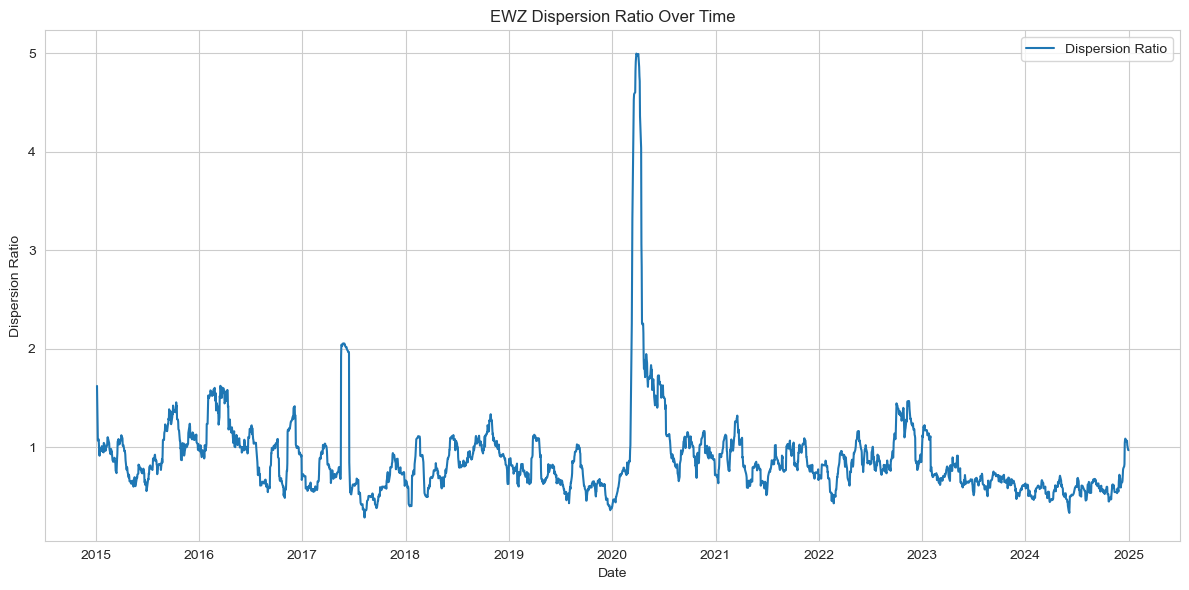

Generated time series plot for EWZ Dispersion Ratio.


In [32]:

# Set a style for better aesthetics
sns.set_style("whitegrid")

# 2. Create a time series line plot of the 'Dispersion_Ratio'
plt.figure(figsize=(12, 6))
plt.plot(ewz_data_cleaned.index, ewz_data_cleaned['Dispersion_Ratio'], label='Dispersion Ratio')

# 3. Label the x-axis as 'Date' and the y-axis as 'Dispersion Ratio'.
plt.xlabel('Date')
plt.ylabel('Dispersion Ratio')

# 4. Add a title to the plot
plt.title('EWZ Dispersion Ratio Over Time')

# 5. Add a legend to the plot
plt.legend()

# 6. Display the plot
plt.tight_layout()
plt.show()

print("Generated time series plot for EWZ Dispersion Ratio.")

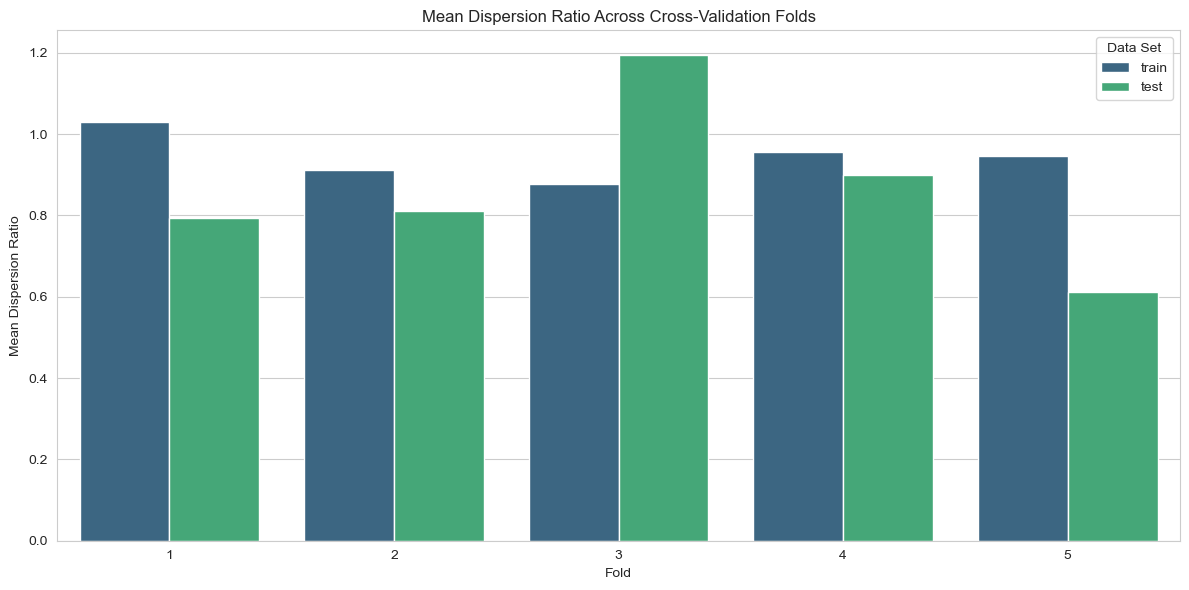

Generated bar plot for Mean Dispersion Ratio across CV folds.


In [33]:

# Ensure seaborn style is set
sns.set_style("whitegrid")

# 7. Create a bar plot to visualize the mean Dispersion Ratio for each fold
plt.figure(figsize=(12, 6))
sns.barplot(data=results_table, x='fold', y='mean', hue='type', palette='viridis')

# 8. Label the x-axis as 'Fold' and the y-axis as 'Mean Dispersion Ratio'.
plt.xlabel('Fold')
plt.ylabel('Mean Dispersion Ratio')

# 9. Add a title to the bar plot
plt.title('Mean Dispersion Ratio Across Cross-Validation Folds')

# 10. Add a legend to differentiate between 'train' and 'test' means.
plt.legend(title='Data Set')

# 11. Display the bar plot.
plt.tight_layout()
plt.show()

print("Generated bar plot for Mean Dispersion Ratio across CV folds.")